## 모두의 딥러닝 개정 3판
### 다섯째마당. 딥러닝 활용하기

https://wikidocs.net/24586

### 2 LSTM과 CNN의 조합을 이용한 영화 리뷰 분류하기  
 - IMDB(Internet Movie DataBase, IMDB)  
  영화와 관련된 정보와 출연진 정보, 개봉 정보, 영화 훅, 평점까지 폭넓은 데이터가 저장된 자료  
 - 영화에 관한 2만5천여 개의 영화 리뷰. 해당 영화에 대해, 긍정/부정 평가인지도 포함.   
 - 각 단어에 대한 전처리 마친 상태  
 - 데이터셋에서 나타나는 빈도에 따라 번호가 정해지므로 빈도가 높은 데이터를 불러와 학습시킬 수 있음.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Embedding, LSTM, Conv1D, MaxPooling1D
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 불러와 학습셋, 테스트셋으로 나눔
# 클래스가 긍정/부정 2가지뿐ㅇ라 one-hot-encoding 과정이 없음

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

In [ ]:
# 단어 수 맞추기
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [ ]:
# 모델 구조 설정
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0,5))
model.add(Conv1D(64, 5, padding='valid', activation='relu', strides=1))         # Conv1D: 1차원 배열의 데이터. Conv2D의 개념을 1차원으로 옮긴 것.
model.add(MaxPooling1D(pool_size=4))                                            # MaxPooling1D: 2차원 배열을 1차원으로 바꾸어 정해진 구역 안에서 가장 큰 값을 다음 층으로 넘기고 나머지는 버림.
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# 현재 설정된 모델 구조 보기
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, None, 64)          0         
 g1D)                                                            
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [ ]:
# 실행 옵션 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# 학습의 조기중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=3)

# 모델 실행
history = model.fit(X_train, y_train, batch_size=40, epochs=100, validation_split=0.25, callbacks=[early_stopping_callback])

Epoch 1/100
469/469 [==============================] - 115s 239ms/step - loss: 0.3802 - accuracy: 0.8159 - val_loss: 0.3175 - val_accuracy: 0.8629
Epoch 2/100
469/469 [==============================] - 136s 290ms/step - loss: 0.2182 - accuracy: 0.9177 - val_loss: 0.2707 - val_accuracy: 0.8842
Epoch 3/100
469/469 [==============================] - 109s 232ms/step - loss: 0.1515 - accuracy: 0.9446 - val_loss: 0.2906 - val_accuracy: 0.8781
Epoch 4/100
469/469 [==============================] - 105s 225ms/step - loss: 0.1038 - accuracy: 0.9666 - val_loss: 0.3398 - val_accuracy: 0.8786
Epoch 5/100
469/469 [==============================] - 126s 269ms/step - loss: 0.0629 - accuracy: 0.9807 - val_loss: 0.3894 - val_accuracy: 0.8816


In [ ]:
# 5번째 에포크에서 학습이 자동 중단되었고, 그 때의 테스트셋 정확도는 87.50%
# 학습이 중단되는 시점은 실행마다 달라질 수 있음.

In [ ]:
# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

# 학습셋과 테스트셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

782/782 [==============================] - 35s 45ms/step - loss: 0.4093 - accuracy: 0.8750

 Test Accuracy: 0.8750


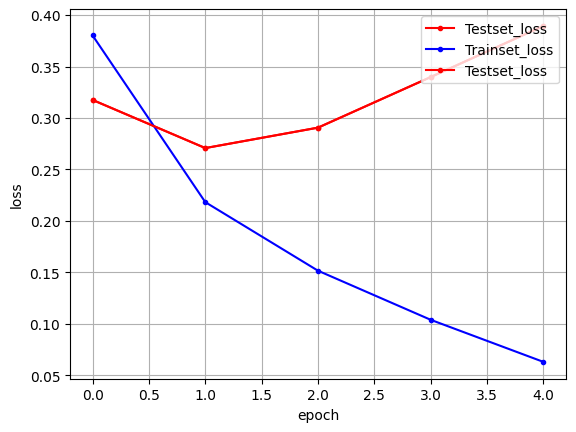

In [ ]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()